# LSTM For Expense Prediction


1. Data Preparation:

  Generates a sample dataset of daily expenses for a user over a 30-day period, with expenses randomly set between 30 and 80.

2. Data Normalization:

  Uses MinMaxScaler to normalize the expense amounts, transforming them into a range between 0 and 1 for better model performance.

3. Sequence Creation:

  Defines a function to create sequences of data, where each sequence consists of the last 5 days' expenses to predict the next day's expense.

4. Model Definition:

  Constructs an LSTM model with one LSTM layer (50 units) followed by a Dense layer for output.

5. Model Compilation:

  Compiles the model using the Adam optimizer and Mean Squared Error (MSE) as the loss function.

6. Model Training:

  Trains the LSTM model on the created sequences for 100 epochs, adjusting weights based on the error of predictions.

7. Expense Prediction:

  Predicts the next day's expense using the last 5 days of data and inversely transforms the predicted value back to the original scale.

8. Result Visualization:

  Plots the actual daily expenses over the month and highlights the predicted next day's expense to visualize the expense trends and model forecast.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2692
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2602
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.2513
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2425
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2337
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2250
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2163
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2077
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1993
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1910
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1829
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1750
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1673
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1598
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1526
Epoch 16/100
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


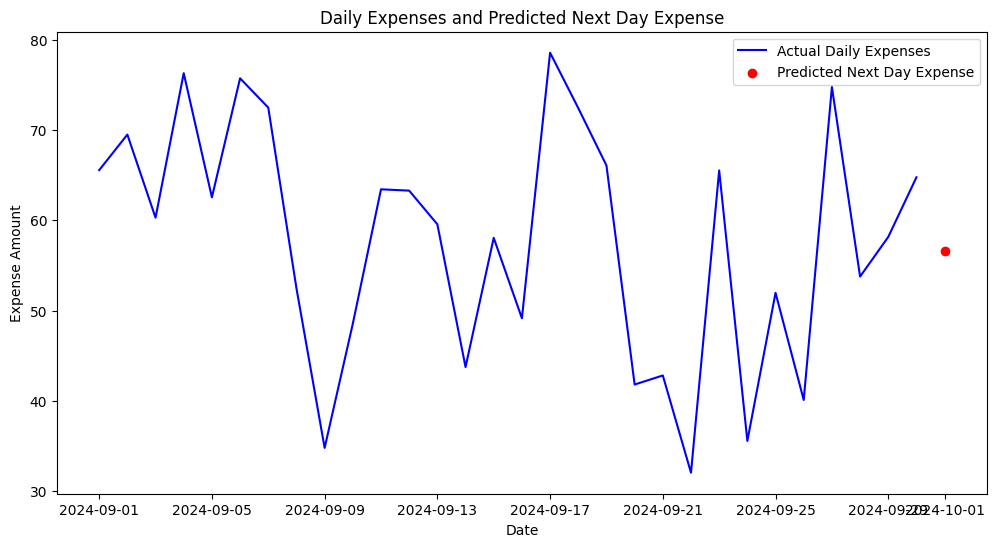

Predicted Next Day Expense: 56.61


In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate sample daily expense data for a user
daily_expenses = {
    'date': pd.date_range(start='2024-09-01', end='2024-09-30'),
    'amount': np.random.uniform(30, 80, size=30)
}
df_expenses = pd.DataFrame(daily_expenses)

# Preprocess data for LSTM
scaler = MinMaxScaler()
data = scaler.fit_transform(df_expenses[['amount']])

# Prepare sequences for LSTM (e.g., using last 5 days to predict next day)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(data, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Predict the next day's expense
predicted = model.predict(np.expand_dims(data[-seq_length:], axis=0))
predicted_expense = scaler.inverse_transform(predicted)[0][0]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_expenses['date'], df_expenses['amount'], label='Actual Daily Expenses', color='blue')
plt.scatter(df_expenses['date'].iloc[-1] + pd.Timedelta(days=1), predicted_expense, color='red', label='Predicted Next Day Expense')
plt.title("Daily Expenses and Predicted Next Day Expense")
plt.xlabel("Date")
plt.ylabel("Expense Amount")
plt.legend()
plt.show()

print(f"Predicted Next Day Expense: {predicted_expense:.2f}")

# BERT for Transaction Categorization

1. Demo Dataset Creation:

  A list of transactions (transaction_texts) with corresponding labels (transaction_labels) is created, where each label represents a specific category (0: groceries, 1: entertainment, 2: rent).
  A label_map dictionary is provided to convert label indices back into category names after predictions.

2. Custom Dataset Class (TransactionDataset):

 This class is designed to prepare and load the transaction data into a format compatible with BERT. It tokenizes each transaction using the BERT tokenizer and returns it with an attention mask and label for each item in the dataset.

3. Data Splitting:

  The transaction data is split into training and validation sets using train_test_split from scikit-learn. The training set is used to fine-tune BERT, while the validation set is used to evaluate its performance.

4. BERT Model Initialization:

  The BERT model is loaded with a classification head for 3 categories (num_labels=3). This model will be fine-tuned specifically for this categorization task.

5. Training Setup (TrainingArguments and Trainer):

  The TrainingArguments specify parameters like batch size, number of training epochs, and logging frequency.
  The Trainer class, which simplifies fine-tuning, is initialized with the model, training arguments, and datasets. Then, the model is trained with trainer.train().

6. Evaluation:

  After fine-tuning, the model is evaluated on the validation set using trainer.evaluate(), and the evaluation metrics (like accuracy and loss) are printed.

7. Prediction on New Data:

  Finally, we test the fine-tuned model on a few new transactions (test_data). Each transaction is tokenized and passed through the model, and the predicted categories are derived by finding the highest scoring label for each transaction.
  The predictions are printed along with the original transactions, showing which category each transaction falls under according to the fine-tuned BERT model.


Note: Due to small size of the dataset model might not properly categorized

In [14]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Step 1: Define the demo dataset with labeled transactions
transaction_texts = [
    "Bought groceries at Walmart",             # groceries
    "Netflix subscription",                    # entertainment
    "Paid apartment rent",                     # rent
    "Grocery shopping at Target",              # groceries
    "Spotify premium subscription",            # entertainment
    "Paid for groceries at Whole Foods",       # groceries
    "Purchased tickets for a concert",         # entertainment
    "Transferred money for rent",              # rent
    "Bought movie tickets for Saturday night", # entertainment
    "Fresh vegetables and fruits",             # groceries
]

transaction_labels = [0, 1, 2, 0, 1, 0, 1, 2, 1, 0]  # Labels: 0 = groceries, 1 = entertainment, 2 = rent

# Label to category mapping for later reference
label_map = {0: "groceries", 1: "entertainment", 2: "rent"}

# Step 2: Create a custom Dataset class for loading and processing data
class TransactionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create train and test datasets
train_texts, val_texts, train_labels, val_labels = train_test_split(transaction_texts, transaction_labels, test_size=0.2, random_state=42)
train_dataset = TransactionDataset(train_texts, train_labels, tokenizer)
val_dataset = TransactionDataset(val_texts, val_labels, tokenizer)

# Step 3: Load BERT model for classification with 3 categories
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Step 4: Define the TrainingArguments and Trainer for fine-tuning
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    warmup_steps=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=5,
    evaluation_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Fine-tune the model
trainer.train()

# Step 5: Evaluate the model on validation data
eval_result = trainer.evaluate()
print(f"Evaluation result: {eval_result}")

# Step 6: Test predictions with fine-tuned model
test_data = [
    "Bought some groceries",
    "Paid rent for November",
    "Enjoyed a movie on Netflix"
]
inputs = tokenizer(test_data, return_tensors='pt', padding=True, truncation=True)
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)
predicted_categories = [label_map[pred.item()] for pred in predictions]

# Displaying predictions
for transaction, category in zip(test_data, predicted_categories):
    print(f"Transaction: {transaction} | Predicted Category: {category}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.889399
2,1.114200,0.916507
3,1.105500,0.972649


Evaluation result: {'eval_loss': 0.972649335861206, 'eval_runtime': 0.8292, 'eval_samples_per_second': 2.412, 'eval_steps_per_second': 1.206, 'epoch': 3.0}
Transaction: Bought some groceries | Predicted Category: groceries
Transaction: Paid rent for November | Predicted Category: groceries
Transaction: Enjoyed a movie on Netflix | Predicted Category: groceries


#  Markov Decision Process (MDP) for Advice Generation

1. Demo Data Creation:

  A spending_summary_df DataFrame is created with random current_balance and remaining_budget values over a 30-day period, with a fixed target_budget for simplicity.

2. Q-table Initialization:

  A Q-table is created with states representing balance levels, days as the time dimension, and three possible actions: "Stay on track," "Increase savings," and "Adjust spending."

3. Training Loop:

  For each day, the model chooses an action based on exploration/exploitation.
  - Reward Calculation:
    Rewards depend on the action taken and whether the current_balance and remaining_budget are within or exceed the target_budget.
  The Q-table is updated with the reward, considering future rewards (discount factor).

5. Advice Generation:

  After training, the best action per day is selected based on Q-values, giving final advice for each day.

6. Output:

  The model outputs a sequence of daily financial advice based on spending behavior.

In [12]:
import numpy as np
import pandas as pd

data = {
    'day': list(range(1, 31)),  # 30-day period
    'current_balance': np.random.randint(500, 1500, 30),  # Random current balance amounts
    'target_budget': [1000] * 30,  # Set a consistent target budget for simplicity
    'days_passed': list(range(1, 31)),
    'remaining_budget': np.random.randint(200, 800, 30)  # Random remaining budget amounts
}

# Convert to DataFrame
spending_summary_df = pd.DataFrame(data)

# Initialize Q-table for RL model
num_days = 30  # Period in days
states = 100  # Discretized states for balance levels
actions = 3  # 0: "Stay on track", 1: "Increase savings", 2: "Adjust spending"
q_table = np.zeros((states, num_days, actions))

# Define parameters for the Q-learning model
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 0.5
exploration_decay = 0.95
min_exploration_rate = 0.1

# Training Loop over the spending summary dataset
for index, row in spending_summary_df.iterrows():
    # State representation based on spending balance and days passed
    target_budget = row['target_budget']
    current_balance_state = min(int(row['current_balance'] // (target_budget / states)), states - 1)
    day_state = row['days_passed'] - 1

    # Action selection
    if np.random.uniform(0, 1) < exploration_rate:
        action = np.random.choice(actions)  # Explore random advice
    else:
        action = np.argmax(q_table[current_balance_state, day_state, :])  # Exploit learned policy

    # Simulate reward based on action
    if action == 0:  # "Stay on track"
        reward = 1 if row['current_balance'] <= target_budget else -1
    elif action == 1:  # "Increase savings"
        reward = 2 if row['remaining_budget'] >= target_budget * 0.5 else -2
    elif action == 2:  # "Adjust spending"
        reward = 1 if row['remaining_budget'] >= target_budget * 0.2 else -1

    # Update Q-table using Q-learning formula
    next_day_state = min(day_state + 1, num_days - 1)
    next_balance_state = min(int(row['current_balance'] // (target_budget / states)), states - 1)
    best_future_action = np.argmax(q_table[next_balance_state, next_day_state, :])

    q_table[current_balance_state, day_state, action] += learning_rate * (
        reward + discount_factor * q_table[next_balance_state, next_day_state, best_future_action] -
        q_table[current_balance_state, day_state, action]
    )

    # Decay exploration rate
    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)

# Final Advice Generation
advice_map = {0: "Stay on track", 1: "Increase savings", 2: "Adjust spending"}
predictions = []
for day_state in range(num_days):
    # Aggregate advice per day
    recommended_action = np.argmax(q_table[:, day_state, :].sum(axis=0))
    predictions.append(advice_map[recommended_action])

# Display the predicted advice for each day
print("\nPredicted Advice for Each Day:")
for day, advice in enumerate(predictions, 1):
    print(f"Day {day}: {advice}")


Predicted Advice for Each Day:
Day 1: Stay on track
Day 2: Stay on track
Day 3: Increase savings
Day 4: Stay on track
Day 5: Stay on track
Day 6: Stay on track
Day 7: Increase savings
Day 8: Increase savings
Day 9: Increase savings
Day 10: Stay on track
Day 11: Stay on track
Day 12: Stay on track
Day 13: Stay on track
Day 14: Adjust spending
Day 15: Stay on track
Day 16: Stay on track
Day 17: Stay on track
Day 18: Increase savings
Day 19: Increase savings
Day 20: Stay on track
Day 21: Increase savings
Day 22: Stay on track
Day 23: Increase savings
Day 24: Stay on track
Day 25: Stay on track
Day 26: Stay on track
Day 27: Increase savings
Day 28: Stay on track
Day 29: Adjust spending
Day 30: Increase savings
